In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importing Dataset 
1. Firstly, DataFrame has to be imported from the Excel file using pandas read_excel() method.
2. After loading it is important to check the complete information of data, as it might have many hidden infomation such as null values in a column/row.
3. Check whether any null values are there or not. If there are null values, then following can be done:
 a. Imputing data using Imputation method in sklearn.
 b. Filling NaN values with mean, median and mode using fillna() method
4. Analyse the data.

In [2]:
inputData = pd.read_excel("Data_Train_rev.xlsx")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
inputData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,JetBlue,24/03/2019,Detroit,Washington,DTW → IAD,22:20,01:10 22 Mar,2h 50m,non-stop,No info,130
1,Southwest,1/05/2019,Raleigh,Detroit,RDU → IXR → BBI → DTW,05:50,13:15,7h 25m,2 stops,No info,255
2,Delta Airlines,9/06/2019,Washington,Atlanta,IAD → LKO → JFK → ATL,09:25,04:25 10 Jun,19h,2 stops,No info,463
3,JetBlue,12/05/2019,Raleigh,Detroit,RDU → NAG → DTW,18:05,23:30,5h 25m,1 stop,No info,207
4,JetBlue,01/03/2019,Detroit,Washington,DTW → NAG → IAD,16:50,21:35,4h 45m,1 stop,No info,443


In [5]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
inputData["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
inputData.shape

(10683, 11)

In [8]:
inputData.dropna(inplace = True)

In [9]:
inputData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
inputData.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Exploratory Data Analysis

From the information seen above, we can see that Date_of_Journey is of data type 'object'.
Therefore, we have to convert this datatype into timestamp to use this column for forecasting.
For this, we require pandas to_datetime method.

<span style="color: green;">**.dt.day method will extract only day of that date**</span>\
<span style="color: green;">**.dt.month method will extract only month of that date**</span>

In [11]:
inputData["Journey_day"] = pd.to_datetime(inputData["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [12]:
inputData["Journey_month"] = pd.to_datetime(inputData["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [13]:
inputData.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
5265,United,21/05/2019,Detroit,Washington,DTW → IAD,17:00,19:35,2h 35m,non-stop,No info,162,21,5
3779,Delta Airlines,24/03/2019,Raleigh,Detroit,RDU → JFK → DTW,06:30,19:40,13h 10m,1 stop,No info,444,24,3
1499,Frontier,18/06/2019,Detroit,Washington,DTW → IAD,23:55,02:45 19 Jun,2h 50m,non-stop,No info,113,18,6
5762,United,12/03/2019,New York City,Buffalo,JFK → IAD → BUF,08:45,16:45,8h,1 stop,No info,403,12,3
7390,Spirit,09/03/2019,Detroit,Washington,DTW → IAD,11:40,14:35,2h 55m,non-stop,No info,243,9,3


Since we have converted converted Date_of_Journey column into integers, we can now drop it as it is of no use.

In [14]:
inputData.drop(["Date_of_Journey"], axis = 1, inplace = True)

Departure time is when a plane leaves the gate.
Similar to the Date_of_Journey we can extract values from Dep_Time. 
We can extract Hours using pd.to_datetime().dt.hour
and minutes using pd.to_datetime().dt.minute

After extraction, since the Dep_Time column is of no further use, we can drop it.

In [15]:
inputData["Dep_hour"] = pd.to_datetime(inputData["Dep_Time"]).dt.hour
 
inputData["Dep_min"] = pd.to_datetime(inputData["Dep_Time"]).dt.minute

inputData.drop(["Dep_Time"], axis = 1, inplace = True)

In [16]:
inputData.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,JetBlue,Detroit,Washington,DTW → IAD,01:10 22 Mar,2h 50m,non-stop,No info,130,24,3,22,20
1,Southwest,Raleigh,Detroit,RDU → IXR → BBI → DTW,13:15,7h 25m,2 stops,No info,255,1,5,5,50
2,Delta Airlines,Washington,Atlanta,IAD → LKO → JFK → ATL,04:25 10 Jun,19h,2 stops,No info,463,9,6,9,25
3,JetBlue,Raleigh,Detroit,RDU → NAG → DTW,23:30,5h 25m,1 stop,No info,207,12,5,18,5
4,JetBlue,Detroit,Washington,DTW → NAG → IAD,21:35,4h 45m,1 stop,No info,443,1,3,16,50


Arrival time is when the plane pulls up to the gate. Just like Date_of_Journey and Dep_Time, we can extract arrival hour and minutes from Arrival_Time and then drop it.

In [17]:
inputData["Arrival_hour"] = pd.to_datetime(inputData["Arrival_Time"]).dt.hour

inputData["Arrival_min"] = pd.to_datetime(inputData["Arrival_Time"]).dt.minute

inputData.drop(["Arrival_Time"], axis = 1, inplace = True)

In [18]:
inputData.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,JetBlue,Detroit,Washington,DTW → IAD,2h 50m,non-stop,No info,130,24,3,22,20,1,10
1,Southwest,Raleigh,Detroit,RDU → IXR → BBI → DTW,7h 25m,2 stops,No info,255,1,5,5,50,13,15
2,Delta Airlines,Washington,Atlanta,IAD → LKO → JFK → ATL,19h,2 stops,No info,463,9,6,9,25,4,25
3,JetBlue,Raleigh,Detroit,RDU → NAG → DTW,5h 25m,1 stop,No info,207,12,5,18,5,23,30
4,JetBlue,Detroit,Washington,DTW → NAG → IAD,4h 45m,1 stop,No info,443,1,3,16,50,21,35


Time taken by plane to reach destination is the Duration. It is the differnce between Departure Time and Arrival time.
Now we assign and convert 'Duration' column into list.

In [19]:
duration = list(inputData["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:                   # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))              # Extract hours from duration.
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts minutes from duration.

In [20]:
# Adding duration_hours and duration_mins list to inputData dataframe

inputData["Duration_hours"] = duration_hours
inputData["Duration_mins"] = duration_mins

In [21]:
inputData.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,JetBlue,Detroit,Washington,DTW → IAD,2h 50m,non-stop,No info,130,24,3,22,20,1,10,2,50
1,Southwest,Raleigh,Detroit,RDU → IXR → BBI → DTW,7h 25m,2 stops,No info,255,1,5,5,50,13,15,7,25
2,Delta Airlines,Washington,Atlanta,IAD → LKO → JFK → ATL,19h,2 stops,No info,463,9,6,9,25,4,25,19,0
3,JetBlue,Raleigh,Detroit,RDU → NAG → DTW,5h 25m,1 stop,No info,207,12,5,18,5,23,30,5,25
4,JetBlue,Detroit,Washington,DTW → NAG → IAD,4h 45m,1 stop,No info,443,1,3,16,50,21,35,4,45


In [22]:
inputData.drop(["Duration"], axis = 1, inplace = True)

In [23]:
inputData.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,JetBlue,Detroit,Washington,DTW → IAD,non-stop,No info,130,24,3,22,20,1,10,2,50
1,Southwest,Raleigh,Detroit,RDU → IXR → BBI → DTW,2 stops,No info,255,1,5,5,50,13,15,7,25
2,Delta Airlines,Washington,Atlanta,IAD → LKO → JFK → ATL,2 stops,No info,463,9,6,9,25,4,25,19,0
3,JetBlue,Raleigh,Detroit,RDU → NAG → DTW,1 stop,No info,207,12,5,18,5,23,30,5,25
4,JetBlue,Detroit,Washington,DTW → NAG → IAD,1 stop,No info,443,1,3,16,50,21,35,4,45


## ----

# Handling Categorical Data
One can find many ways to handle categorical data. Some of the categorical data are 
1. NOMINAL DATA is the data that is not in any order. We can use OneHotEncoder to handle this type of data.
2. ORDINAL DATA is the data that is in order. We can use LabelEncoder to handle this type of data.

## Airline vs price data

In [24]:
inputData["Airline"].value_counts()

Delta Airlines                       3849
JetBlue                              2053
Southwest                            1751
Multiple carriers                    1196
American Airlines                     818
United                                479
Frontier                              319
Spirit                                194
Multiple carriers Premium economy      13
Delta Airlines Business                 6
United Premium economy                  3
Alaska Airlines                         1
Name: Airline, dtype: int64

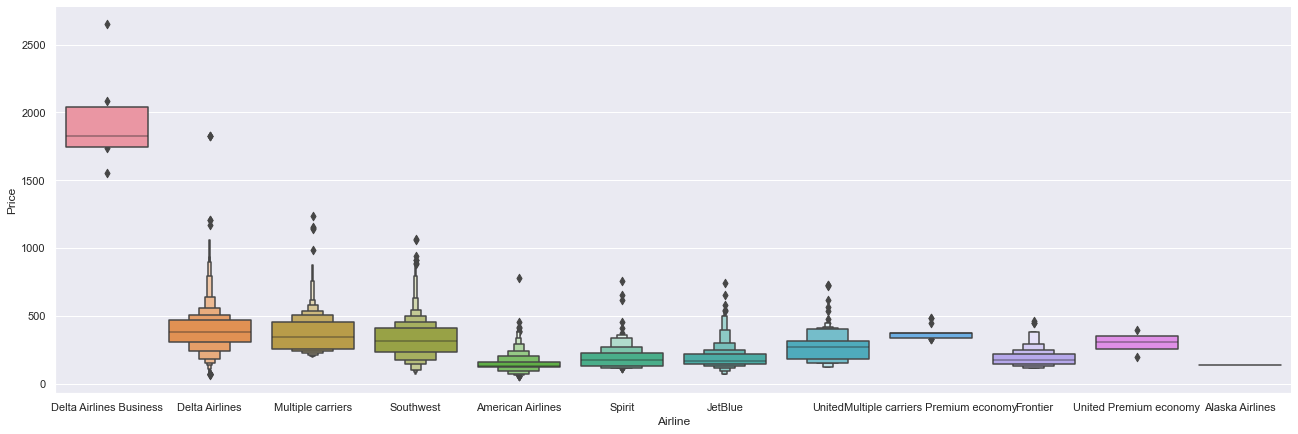

In [25]:
sns.catplot(y = "Price", x = "Airline", data = inputData.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

From the information above, we can see that Delta Airlines Business has the highest Price. Apart from the first Airlines almost all are having similar median.

In [26]:
# As Airline is Nominal Categorical data, we will perform OneHotEncoder

Airline = inputData[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_American Airlines,Airline_Delta Airlines,Airline_Delta Airlines Business,Airline_Frontier,Airline_JetBlue,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_Southwest,Airline_Spirit,Airline_United,Airline_United Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


#### ----

## Source vs Price data

In [27]:
inputData["Source"].value_counts()

Washington       4536
Raleigh          2871
Detroit          2197
New York City     697
Boston            381
Name: Source, dtype: int64

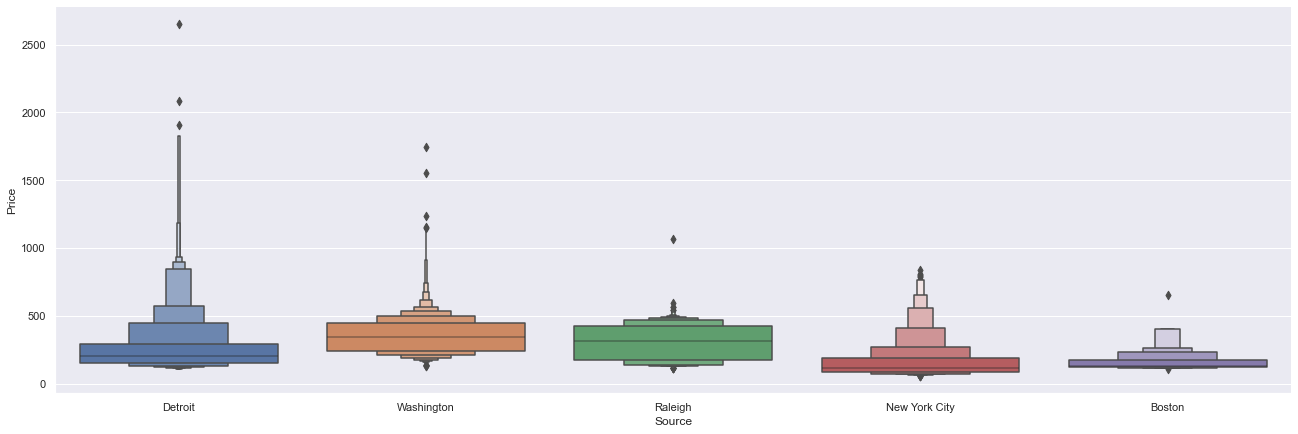

In [28]:
sns.catplot(y = "Price", x = "Source", data = inputData.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

We can see some outliers in Detroit while the others place doe not too different.

In [29]:
# As source is Nominal categorical data, we will perform OneHotEncoding. 
# Here, Detroit Source can be representated by OOOO.

Source = inputData[["Source"]]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Detroit,Source_New York City,Source_Raleigh,Source_Washington
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,1,0,0,0


#### ----

## Destination data

In [30]:
inputData["Destination"].value_counts()

Atlanta       4536
Detroit       2871
Washington    2197
Buffalo        697
Raleigh        381
Name: Destination, dtype: int64

In [31]:
# As Destination is Nominal categorical data, we will perform OneHotEncoding 

Destination = inputData[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Buffalo,Destination_Detroit,Destination_Raleigh,Destination_Washington
0,0,0,0,1
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,1


#### ----

## Route data

In [32]:
inputData["Route"]

0                    DTW → IAD
1        RDU → IXR → BBI → DTW
2        IAD → LKO → JFK → ATL
3              RDU → NAG → DTW
4              DTW → NAG → IAD
                 ...          
10678                RDU → DTW
10679                RDU → DTW
10680                DTW → IAD
10681                DTW → IAD
10682    IAD → GOI → JFK → ATL
Name: Route, Length: 10682, dtype: object

Almost 80% of cells in Additional_info is no_info. Along with that, Route and Total_Stops are related to each other. This, we drop Route and Additional_Info.

In [33]:
inputData.drop(["Route","Additional_Info"], axis = 1, inplace = True)

In [34]:
inputData["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# As this is case of Ordinal Categorical data, we can perform LabelEncoder.
# Here values are assigned with corresponding keys.

inputData.replace({"non-stop" : 0, "1 stop": 1, "2 stops": 2, "3 stops":3, "4 stops": 4}, inplace = True)

In [36]:
inputData.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,JetBlue,Detroit,Washington,0,130,24,3,22,20,1,10,2,50
1,Southwest,Raleigh,Detroit,2,255,1,5,5,50,13,15,7,25
2,Delta Airlines,Washington,Atlanta,2,463,9,6,9,25,4,25,19,0
3,JetBlue,Raleigh,Detroit,1,207,12,5,18,5,23,30,5,25
4,JetBlue,Detroit,Washington,1,443,1,3,16,50,21,35,4,45


#### ----

In [37]:
# Concatenate dataframe that consist of inputData, Airline, Source, and Destination
inputdf = pd.concat([inputData,Airline,Source,Destination], axis = 1)

In [38]:
inputdf.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_American Airlines,Airline_Delta Airlines,Airline_Delta Airlines Business,Airline_Frontier,Airline_JetBlue,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_Southwest,Airline_Spirit,Airline_United,Airline_United Premium economy,Source_Detroit,Source_New York City,Source_Raleigh,Source_Washington,Destination_Buffalo,Destination_Detroit,Destination_Raleigh,Destination_Washington
0,JetBlue,Detroit,Washington,0,130,24,3,22,20,1,10,2,50,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,Southwest,Raleigh,Detroit,2,255,1,5,5,50,13,15,7,25,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,Delta Airlines,Washington,Atlanta,2,463,9,6,9,25,4,25,19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,JetBlue,Raleigh,Detroit,1,207,12,5,18,5,23,30,5,25,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,JetBlue,Detroit,Washington,1,443,1,3,16,50,21,35,4,45,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [39]:
inputdf.drop(["Airline","Source", "Destination"], axis = 1, inplace = True)

In [40]:
inputdf.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_American Airlines,Airline_Delta Airlines,Airline_Delta Airlines Business,Airline_Frontier,Airline_JetBlue,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_Southwest,Airline_Spirit,Airline_United,Airline_United Premium economy,Source_Detroit,Source_New York City,Source_Raleigh,Source_Washington,Destination_Buffalo,Destination_Detroit,Destination_Raleigh,Destination_Washington
0,0,130,24,3,22,20,1,10,2,50,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,255,1,5,5,50,13,15,7,25,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,2,463,9,6,9,25,4,25,19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,207,12,5,18,5,23,30,5,25,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,443,1,3,16,50,21,35,4,45,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [41]:
inputdf.shape

(10682, 29)

# ----

# Test Set

In [42]:
testData = pd.read_excel(r"Test_set_rev.xlsx")

In [43]:
testData.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Delta Airlines,6/06/2019,Washington,Atlanta,IAD → JFK → ATL,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,JetBlue,12/05/2019,Raleigh,Detroit,RDU → BOS → DTW,06:20,10:20,4h,1 stop,No info
2,Delta Airlines,21/05/2019,Washington,Atlanta,IAD → JFK → ATL,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Washington,Atlanta,IAD → JFK → ATL,08:00,21:00,13h,1 stop,No info
4,Frontier,24/06/2019,Detroit,Washington,DTW → IAD,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [44]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(testData.info())

print()
print()

print("Null values :")
print("-"*75)
testData.dropna(inplace = True)
print(testData.isnull().sum())

# EDA

# Date_of_Journey
testData["Journey_day"] = pd.to_datetime(testData.Date_of_Journey, format="%d/%m/%Y").dt.day
testData["Journey_month"] = pd.to_datetime(testData["Date_of_Journey"], format = "%d/%m/%Y").dt.month
testData.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
testData["Dep_hour"] = pd.to_datetime(testData["Dep_Time"]).dt.hour
testData["Dep_min"] = pd.to_datetime(testData["Dep_Time"]).dt.minute
testData.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
testData["Arrival_hour"] = pd.to_datetime(testData.Arrival_Time).dt.hour
testData["Arrival_min"] = pd.to_datetime(testData.Arrival_Time).dt.minute
testData.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(testData["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:                   # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))              # Extract hours from duration.
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts minutes from duration.

# Adding Duration column to test set
testData["Duration_hours"] = duration_hours
testData["Duration_mins"] = duration_mins
testData.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(testData["Airline"].value_counts())
Airline = pd.get_dummies(testData["Airline"], drop_first = True)

print()

print("Source")
print("-"*75)
print(testData["Source"].value_counts())
Source = pd.get_dummies(testData["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(testData["Destination"].value_counts())
Destination = pd.get_dummies(testData["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
testData.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
testData.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
testdf = pd.concat([testData, Airline, Source, Destination], axis = 1)

testdf.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", testdf.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [45]:
testdf.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Delta Airlines,Delta Airlines Business,Frontier,JetBlue,Multiple carriers,Multiple carriers Premium economy,Southwest,Spirit,United,United Premium economy,Detroit,New York City,Raleigh,Washington,Buffalo,Detroit,Raleigh,Washington
0,1,6,6,17,30,4,25,10,55,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,21,5,19,15,19,0,23,45,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## ----

## Feature Selection

Here, we find out the best contributing feature, which has good relation with target variable.

Following are some of the feature selection methods,
1. <span style="color: green;">**heatmap**</span>
2. <span style="color: green;">**feature_importance_**</span>
3. <span style="color: green;">**SelectKBest**</span>

In [46]:
inputdf.shape

(10682, 29)

In [47]:
inputdf.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_American Airlines', 'Airline_Delta Airlines',
       'Airline_Delta Airlines Business', 'Airline_Frontier',
       'Airline_JetBlue', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_Southwest',
       'Airline_Spirit', 'Airline_United', 'Airline_United Premium economy',
       'Source_Detroit', 'Source_New York City', 'Source_Raleigh',
       'Source_Washington', 'Destination_Buffalo', 'Destination_Detroit',
       'Destination_Raleigh', 'Destination_Washington'],
      dtype='object')

In [48]:
X = inputdf.loc[:,['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_American Airlines', 'Airline_Delta Airlines',
       'Airline_Delta Airlines Business', 'Airline_Frontier',
       'Airline_JetBlue', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_Southwest',
       'Airline_Spirit', 'Airline_United', 'Airline_United Premium economy',
       'Source_Detroit', 'Source_New York City', 'Source_Raleigh',
       'Source_Washington', 'Destination_Buffalo', 'Destination_Detroit',
       'Destination_Raleigh', 'Destination_Washington']]

X.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_American Airlines,Airline_Delta Airlines,Airline_Delta Airlines Business,Airline_Frontier,Airline_JetBlue,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_Southwest,Airline_Spirit,Airline_United,Airline_United Premium economy,Source_Detroit,Source_New York City,Source_Raleigh,Source_Washington,Destination_Buffalo,Destination_Detroit,Destination_Raleigh,Destination_Washington
0,0,130,24,3,22,20,1,10,2,50,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2,255,1,5,5,50,13,15,7,25,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,2,463,9,6,9,25,4,25,19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,207,12,5,18,5,23,30,5,25,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,443,1,3,16,50,21,35,4,45,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [49]:
y = inputdf.iloc[:,1]
y.head()

0    130
1    255
2    463
3    207
4    443
Name: Price, dtype: int64

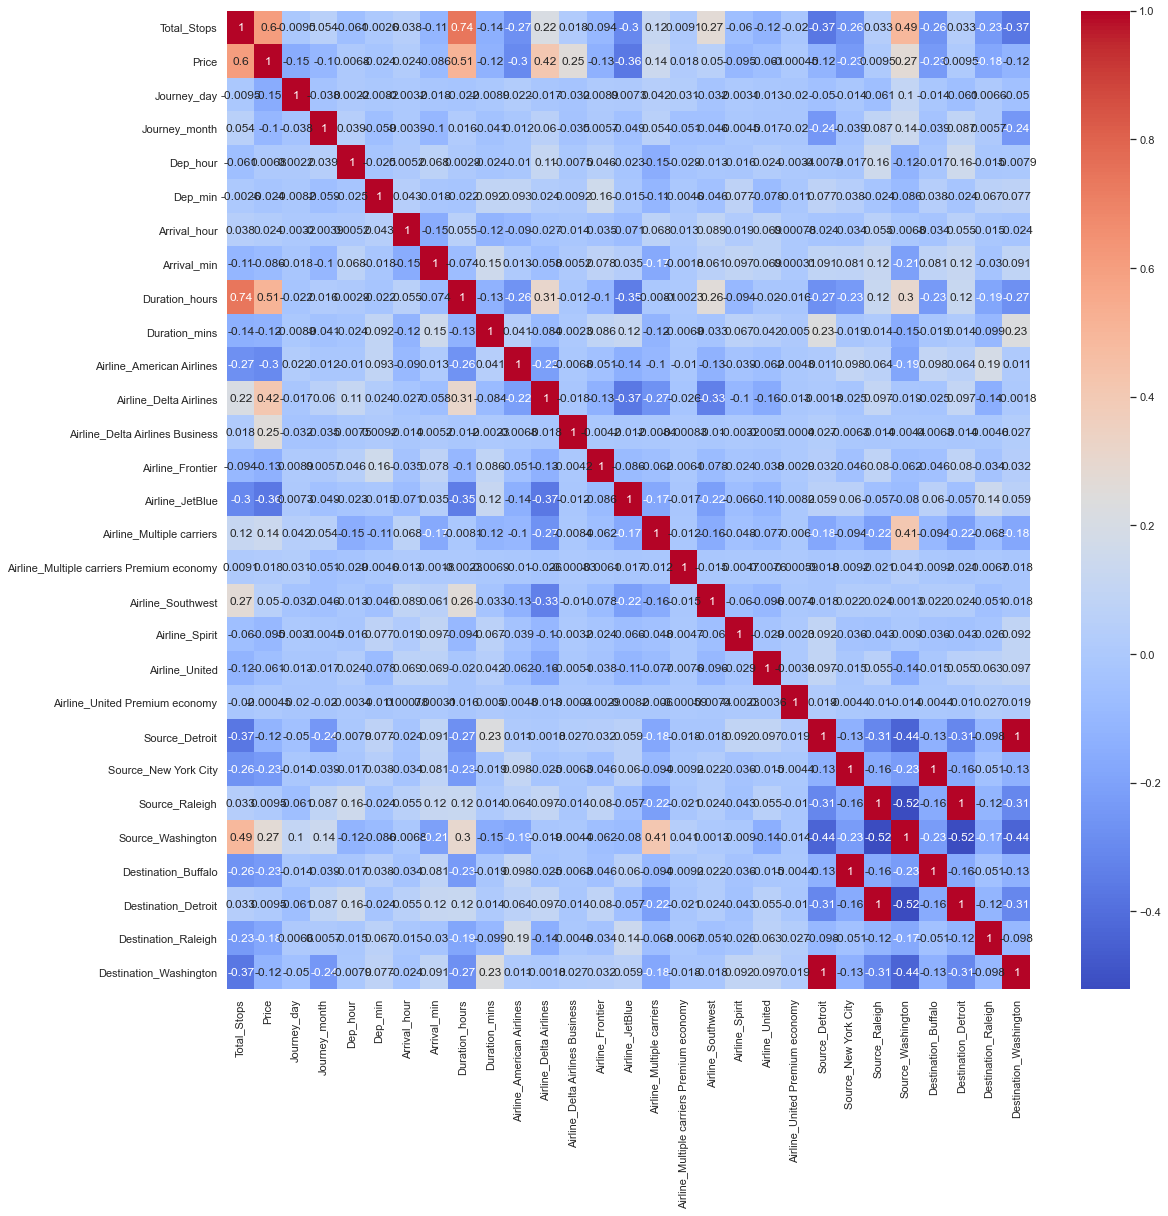

In [50]:
# Correlation between Independent(X) and Dependent attributes(y)

plt.figure(figsize = (18,18))

sns.heatmap(inputdf.corr(),annot = True, cmap = "coolwarm")

plt.show()

In [51]:
# Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [52]:
#ExtraTreesRegressor is used to choose the important feature for the prediction
print(selection.feature_importances_)

[1.48752904e-01 6.31642837e-01 2.38921166e-03 2.29632754e-03
 1.02665600e-04 1.48253596e-04 3.20143637e-04 1.47262723e-04
 5.07531061e-02 3.95437094e-04 7.55612183e-04 1.01653175e-01
 3.32620998e-02 8.62700011e-05 6.44491711e-03 2.62488855e-03
 1.13273016e-05 1.14459497e-03 4.38830755e-06 1.39121027e-04
 8.40443815e-08 2.38124026e-03 2.01610288e-03 2.76917645e-04
 8.36199212e-03 2.26765008e-03 2.03332690e-04 2.78221074e-05
 1.39031520e-03]


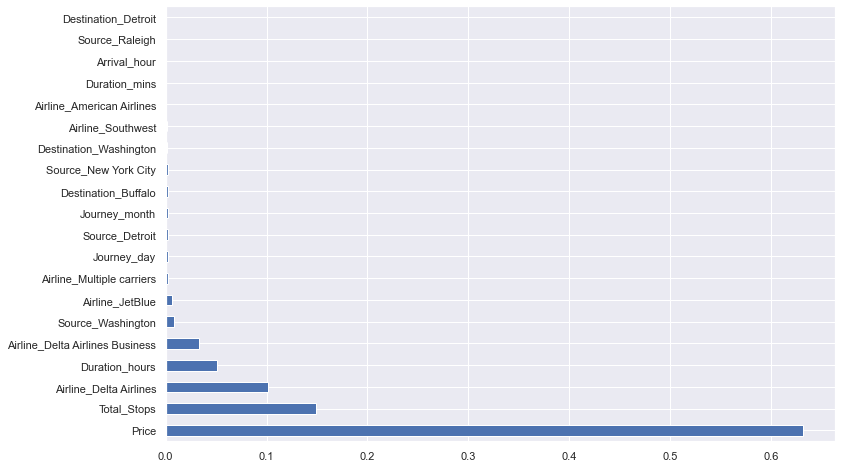

In [53]:
# Plot graph of important feature for better visualization

plt.figure(figsize =(12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = "barh")
plt.show()

## ----

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [55]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [56]:
y_pred = reg_rf.predict(X_test)

In [57]:
reg_rf.score(X_train,y_train)

0.9995464537468662

In [58]:
reg_rf.score(X_test,y_test)

0.9995343232765878

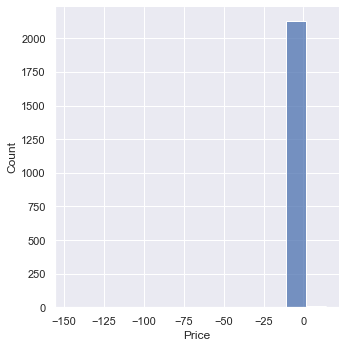

In [59]:
sns.displot(y_test-y_pred)
plt.show()

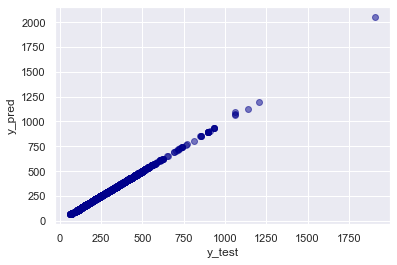

In [60]:
plt.scatter(y_test,y_pred,alpha = 0.5, color = "DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [61]:
from sklearn import metrics

In [62]:
print("MAE:" , metrics.mean_absolute_error(y_test,y_pred))
print("MSE:" , metrics.mean_squared_error(y_test,y_pred))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.14256902199344745
MSE: 11.156880439868997
RMSE: 3.340191677115102


In [63]:
metrics.r2_score(y_test, y_pred)

0.9995343232765878

## Hyperparameter Tuning

* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [66]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [69]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring ='neg_mean_squared_error', n_iter = 3, cv = 2, verbose = 2, random_state = 42, n_jobs = 1)

In [70]:
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.5s


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [72]:
prediction = rf_random.predict(X_test)

In [73]:
print("MAE:" , metrics.mean_absolute_error(y_test,prediction))
print("MSE:" , metrics.mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 2.5773999306897055
MSE: 387.30519480078044
RMSE: 19.680071005989294


# Save the model to reuse it again

In [ ]:
import pickle
# open a file, where you want to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)


In [ ]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_prediction)